## Setting up working Directory and Path

In [2]:
home_dir = normalizePath("~")
relative_path = file.path("R programs")
full_path = file.path(home_dir, relative_path)
setwd(full_path)
getwd()

[1] "C:/Users/death-star/Documents/R programs"

## Data Visualization
* Loading the transanctions DataFrame

In [3]:
Store_sales = read.csv("Data/store-forecasting/transactions.csv")
head(Store_sales)
Store_sales = subset(Store_sales, select = -store_nbr)
colnames(Store_sales)
Store_sales = na.omit(Store_sales)
Store_sales$date = as.Date(Store_sales$date)  # date was Charecter
head(Store_sales)

,date,store_nbr,transactions
,<chr>,<int>,<int>
1,2013-01-01,25,770
2,2013-01-02,1,2111
3,2013-01-02,2,2358
4,2013-01-02,3,3487
5,2013-01-02,4,1922
6,2013-01-02,5,1903


[1] "date"         "transactions"

,date,transactions
,<date>,<int>
1,2013-01-01,770
2,2013-01-02,2111
3,2013-01-02,2358
4,2013-01-02,3487
5,2013-01-02,1922
6,2013-01-02,1903


* Plotting directly

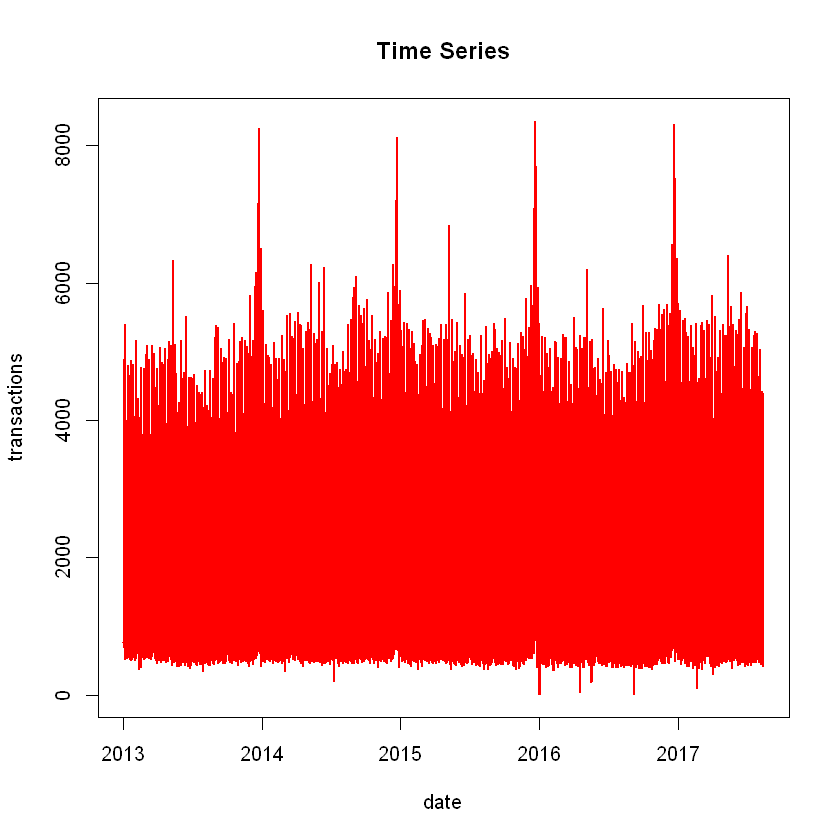

In [4]:
plot(Store_sales, 
        type = "l",         # l for line plot
        main = "Time Series", # Central Heading
        col ="Red",
        lwd = 2                 #Line Width
)


## Using Library Zoo



Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Warning message in zoo(Store_sales$transactions, Store_sales$date):
"some methods for "zoo" objects do not work if the index entries in 'order.by' are not unique"


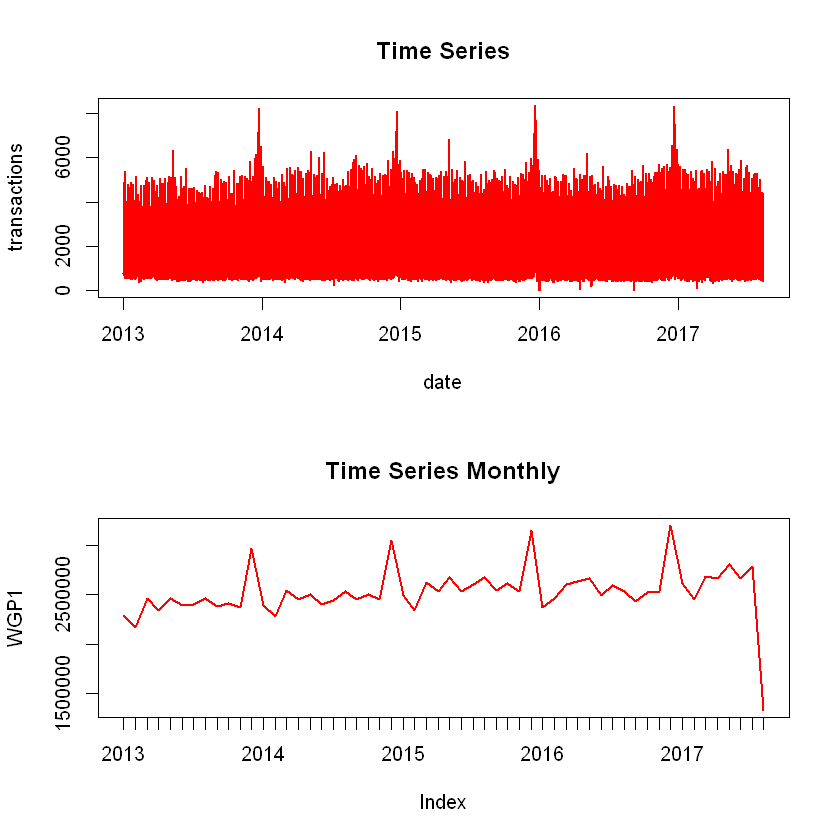

In [5]:
library(zoo)
WGP = zoo(Store_sales$transactions,Store_sales$date)
WGP1 = aggregate(WGP , as.yearmon)
par(mfrow = c(2,1))
plot(Store_sales,  type = "l",    main = "Time Series", col ="Red",lwd = 2)
plot(WGP1,  type = "l",    main = "Time Series Monthly", col ="Red",lwd = 2)


* Barplot

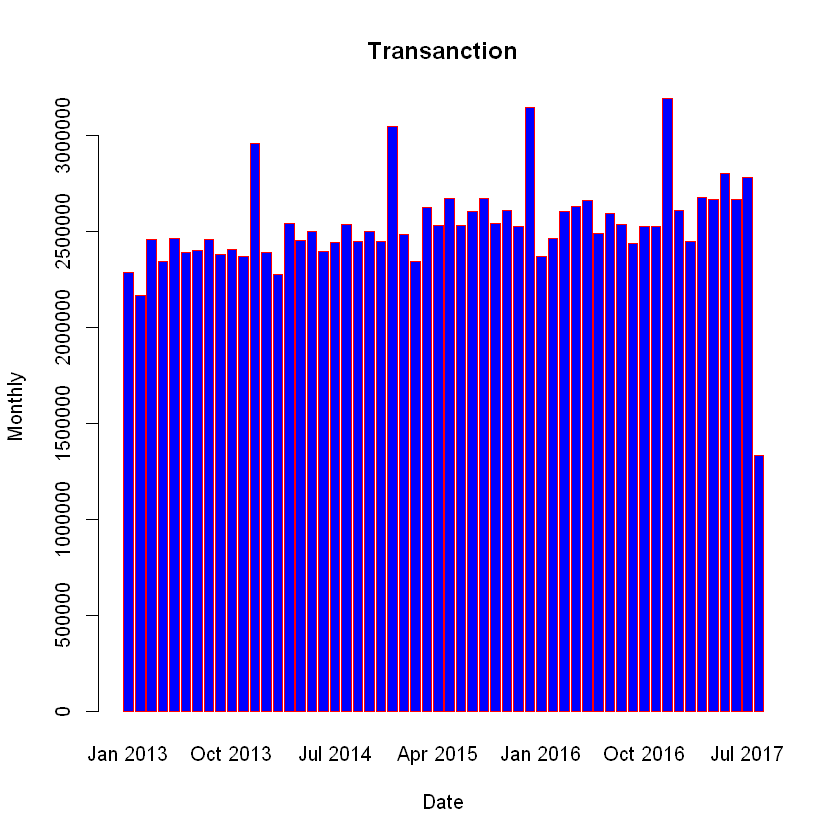

In [6]:
par(mfrow = c(1,1))
barplot(WGP1 , ylab = "Monthly", xlab = "Date", col = "Blue", main = "Transanction", border = "red")

In [8]:
store_sales_data = read.csv("Data/store-forecasting/train.csv")
head(store_sales_data)
store_sales_data$family = as.factor(store_sales_data$family)
levels(store_sales_data$family)

,id,date,store_nbr,family,sales,onpromotion
,<int>,<chr>,<int>,<chr>,<dbl>,<int>
1,0,2013-01-01,1,AUTOMOTIVE,0,0
2,1,2013-01-01,1,BABY CARE,0,0
3,2,2013-01-01,1,BEAUTY,0,0
4,3,2013-01-01,1,BEVERAGES,0,0
5,4,2013-01-01,1,BOOKS,0,0
6,5,2013-01-01,1,BREAD/BAKERY,0,0


[1] "AUTOMOTIVE"                 "BABY CARE"                 
 [3] "BEAUTY"                     "BEVERAGES"                 
 [5] "BOOKS"                      "BREAD/BAKERY"              
 [7] "CELEBRATION"                "CLEANING"                  
 [9] "DAIRY"                      "DELI"                      
[11] "EGGS"                       "FROZEN FOODS"              
[13] "GROCERY I"                  "GROCERY II"                
[15] "HARDWARE"                   "HOME AND KITCHEN I"        
[17] "HOME AND KITCHEN II"        "HOME APPLIANCES"           
[19] "HOME CARE"                  "LADIESWEAR"                
[21] "LAWN AND GARDEN"            "LINGERIE"                  
[23] "LIQUOR,WINE,BEER"           "MAGAZINES"                 
[25] "MEATS"                      "PERSONAL CARE"             
[27] "PET SUPPLIES"               "PLAYERS AND ELECTRONICS"   
[29] "POULTRY"                    "PREPARED FOODS"            
[31] "PRODUCE"                    "SCHOOL AND OFFICE SUPPLIES"
[33] "SEAFOOD"

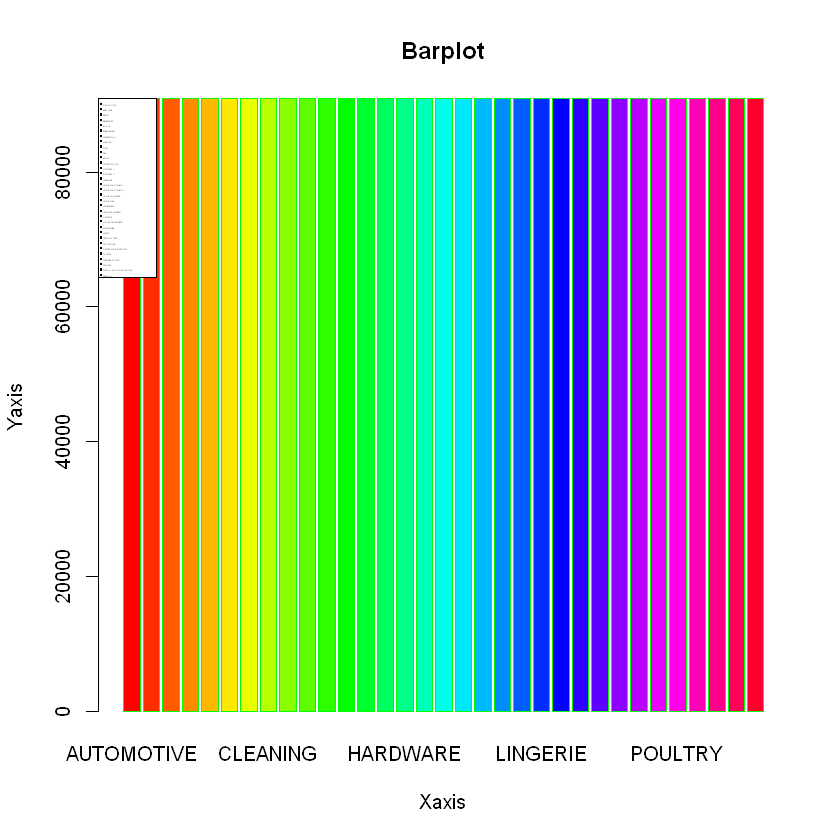

In [14]:
barplot(table(store_sales_data$family), main = "Barplot", col = rainbow(length(levels(store_sales_data$family))),
        ylab = "Yaxis", xlab = "Xaxis", border = "Green")
legend("topleft", levels(store_sales_data$family), fill = rainbow(length(levels(store_sales_data$family))), cex = 0.1)

,id,pop,shop,brand,container,capacity,price,quantity
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>
1,0,672130,shop_1,kinder-cola,glass,500ml,0.96,13280
2,1,672130,shop_1,kinder-cola,plastic,1.5lt,2.86,6727
3,2,672130,shop_1,kinder-cola,can,330ml,0.87,9848
4,3,672130,shop_1,adult-cola,glass,500ml,1.00,20050
5,4,672130,shop_1,adult-cola,can,330ml,0.39,25696
6,5,672130,shop_1,orange-power,glass,500ml,1.00,15041


Var1,Freq
<fct>,<int>
adult-cola,1296
gazoza,1296
kinder-cola,1296
lemon-boost,1296
orange-power,1296


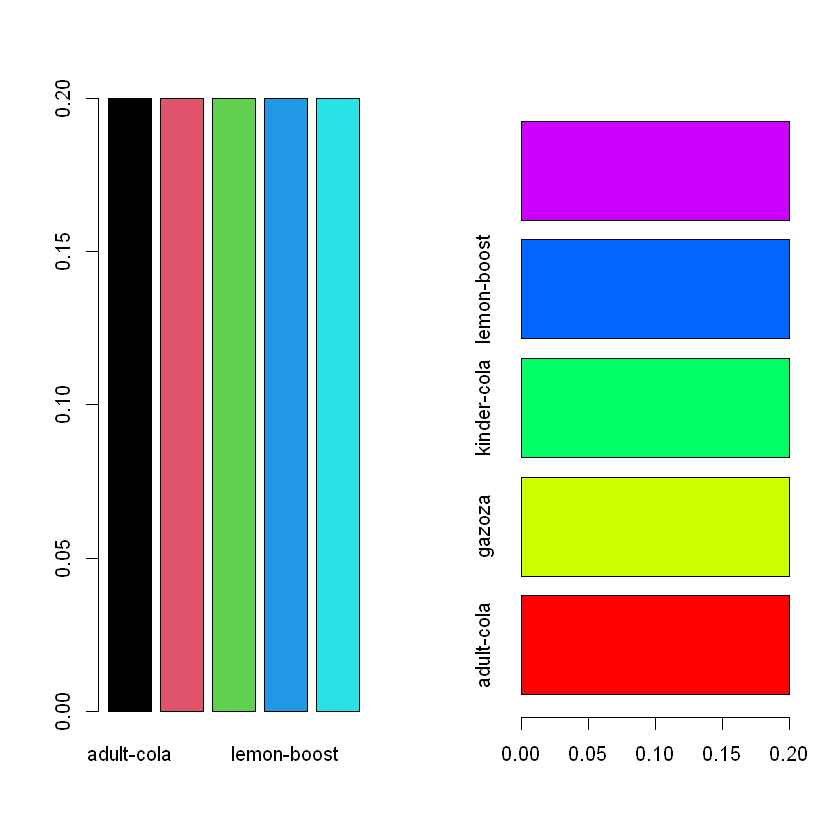

In [22]:
cola = read.csv("week_1/cola.csv")
cola = na.omit(cola)
head(cola)
cola_table = table(cola$brand)
cola_table = cbind.data.frame(cola_table)
cola_table
cola_table$Relative_Freq = cola_table$Freq / sum(cola_table$Freq)
par(mfcol =  c(1,2))
barplot(cola_table$Relative_Freq , names.arg = cola_table$Var1, col = c(1,2,3,4,5))
barplot(cola_table$Relative_Freq , names.arg = cola_table$Var1, col = rainbow(5), horiz = T)

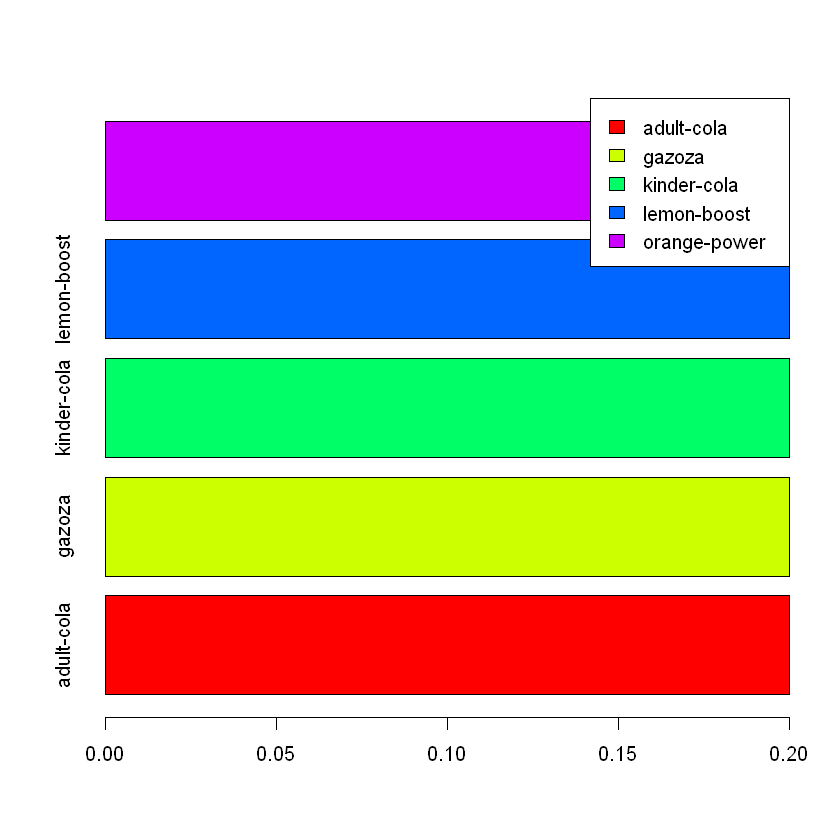

In [25]:
par(mfrow = c(1,1))
barplot(cola_table$Relative_Freq , names.arg = cola_table$Var1, col = rainbow(5), horiz = T)
legend("topright", legend = c(cola_table$Var1) , fill =rainbow(5) )

### Pie Plots

[1] "20%" "20%" "20%" "20%" "20%"

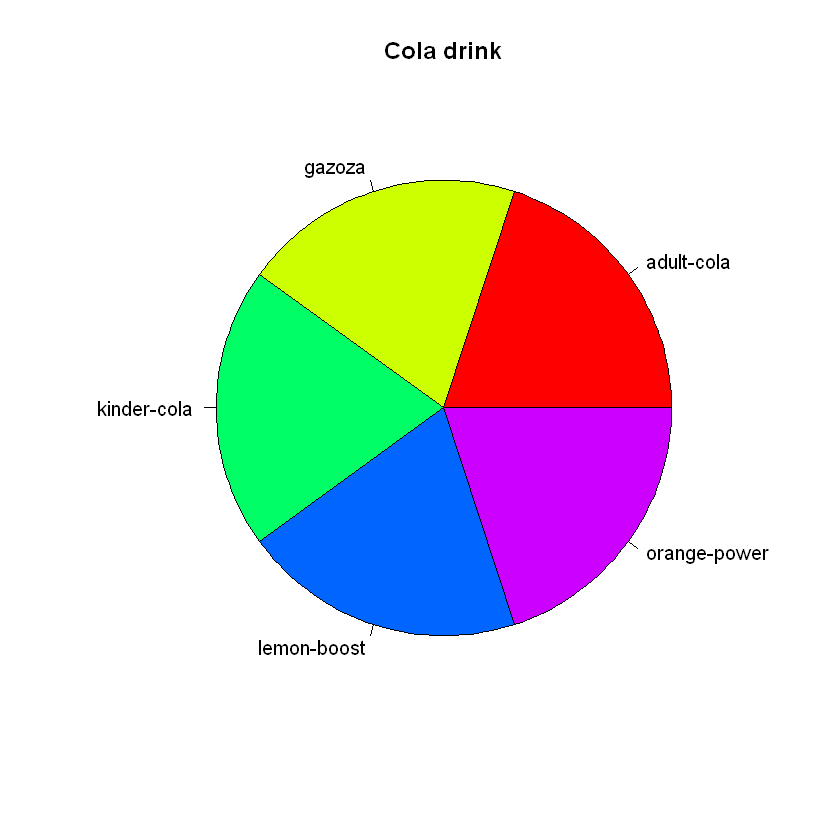

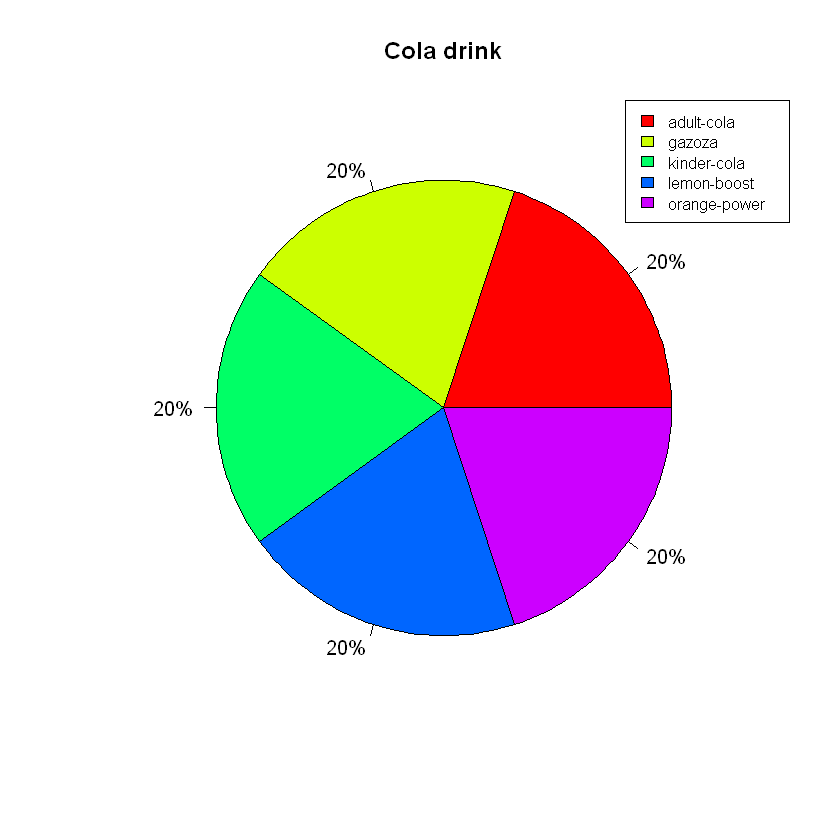

In [30]:
pie(cola_table$Relative_Freq , labels = cola_table$Var1, main = "Cola drink", col = rainbow(5))
paste0(round(100*cola_table$Relative_Freq, 2), "%")
pie(cola_table$Relative_Freq , labels = paste0(round(100*cola_table$Relative_Freq, 2), "%"), main = "Cola drink", col = rainbow(5))
legend("topright",legend =  cola_table$Var1, fill = rainbow(5),cex = 0.8)

## Plotrix
* For **3d** Plots

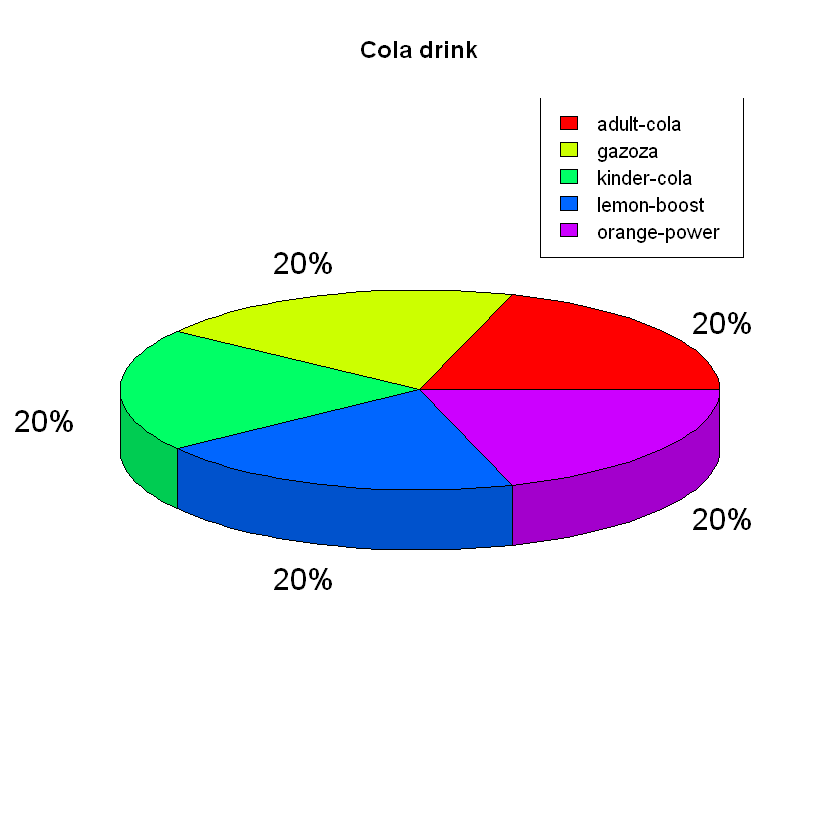

In [32]:
library(plotrix)
pie3D(cola_table$Relative_Freq , labels = paste0(round(100*cola_table$Relative_Freq, 2), "%"), main = "Cola drink", col = rainbow(5))
legend("topright",legend =  cola_table$Var1, fill = rainbow(5),cex = 1)

## Plotting histograms

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  50.00   62.00   75.00   75.03   88.00  100.00 

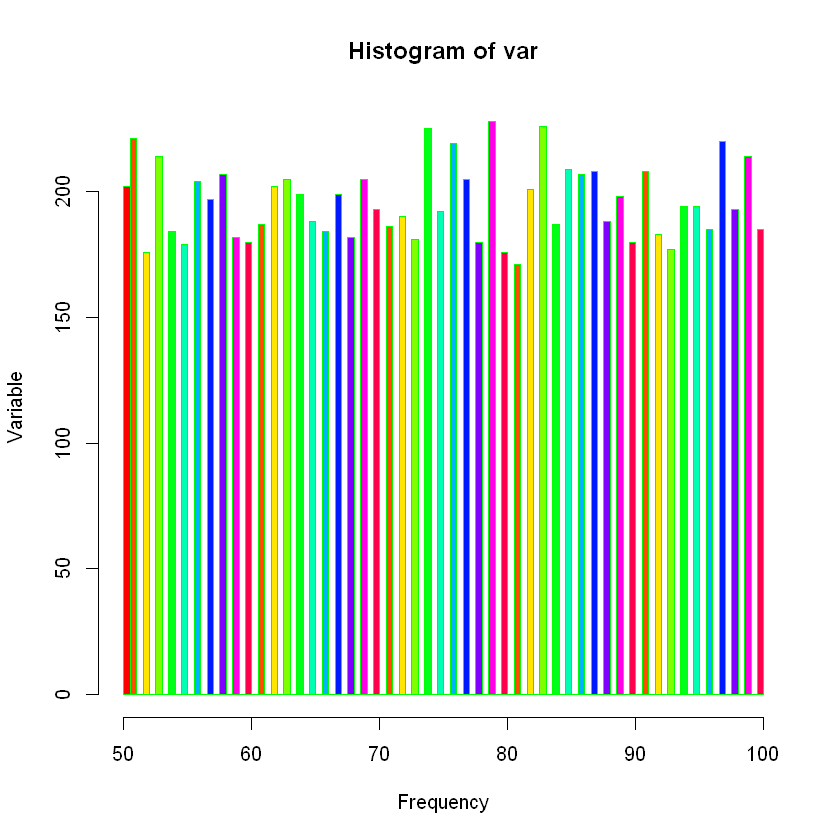

In [33]:
var = sample(50:100,10000 , replace = T)
summary(var)
hist(var , xlab = "Frequency" ,ylab = "Variable", col = rainbow(20), border = "green",
    breaks = 100)

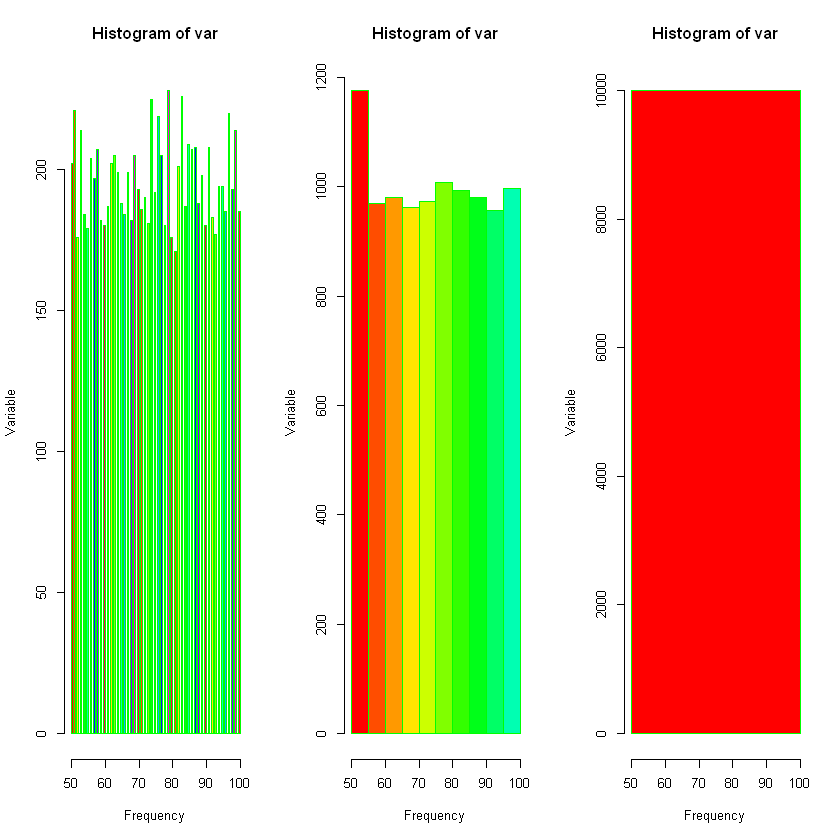

In [34]:
par(mfrow = c(1,3))
hist(var , xlab = "Frequency" ,ylab = "Variable", col = rainbow(20), border = "green",
    breaks = 100)
hist(var , xlab = "Frequency" ,ylab = "Variable", col = rainbow(20), border = "green",
    breaks = 10)
hist(var , xlab = "Frequency" ,ylab = "Variable", col = rainbow(20), border = "green",
    breaks = 1) 

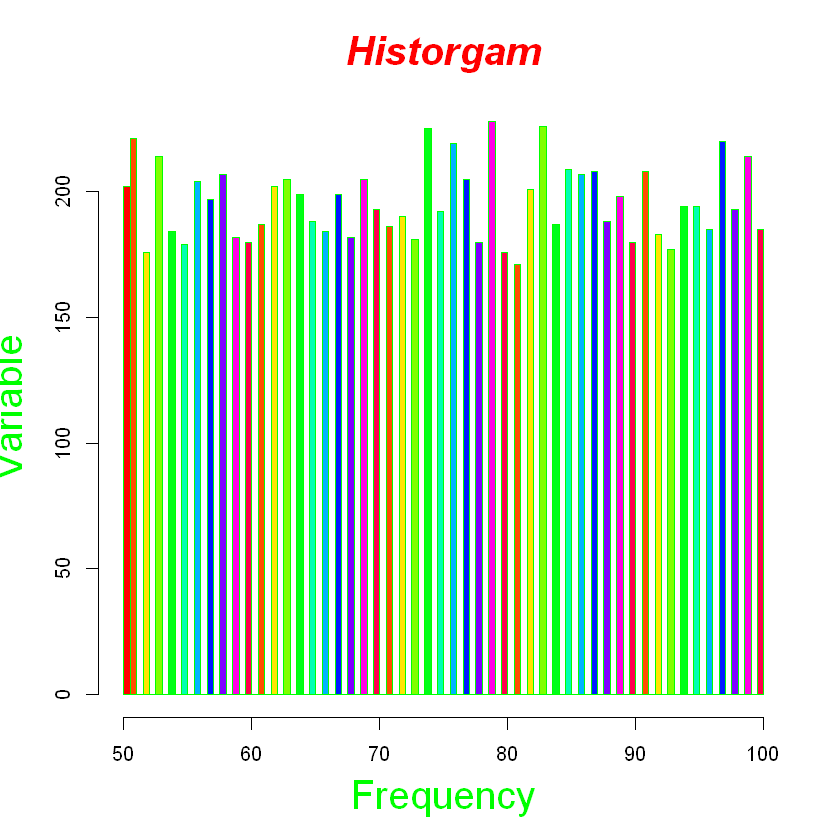

In [37]:
par(mfrow = c(1, 1))
hist(var , xlab = "Frequency" ,ylab = "Variable", col = rainbow(20), border = "green",
    breaks = 100, main = "Historgam", cex.main = 2, font.main = 4 , cex.axis = 1,
    col.lab ="green", col.main = "red", col.axis = "black", cex.lab = 2)

### Storing the the histogram in the variable
* mids is the x coordinate
* counts is the y coordinte

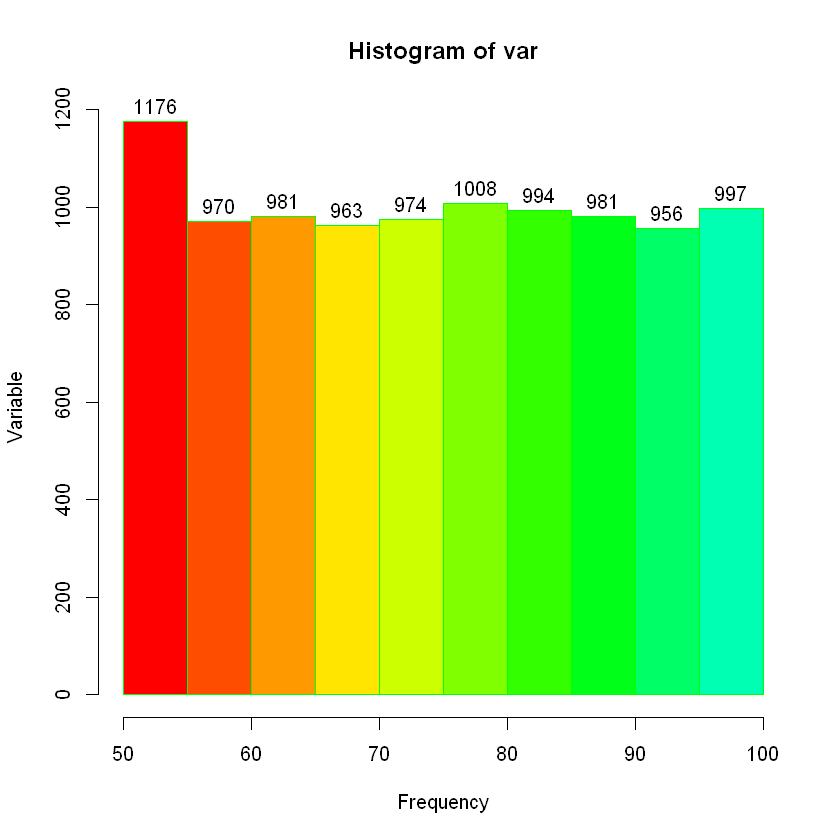

In [38]:
m = hist(var , xlab = "Frequency" ,ylab = "Variable", col = rainbow(20), border = "green",
    breaks = 10)

text(m$mids, m$counts, labels = m$counts, adj = c(0.5, -0.5))

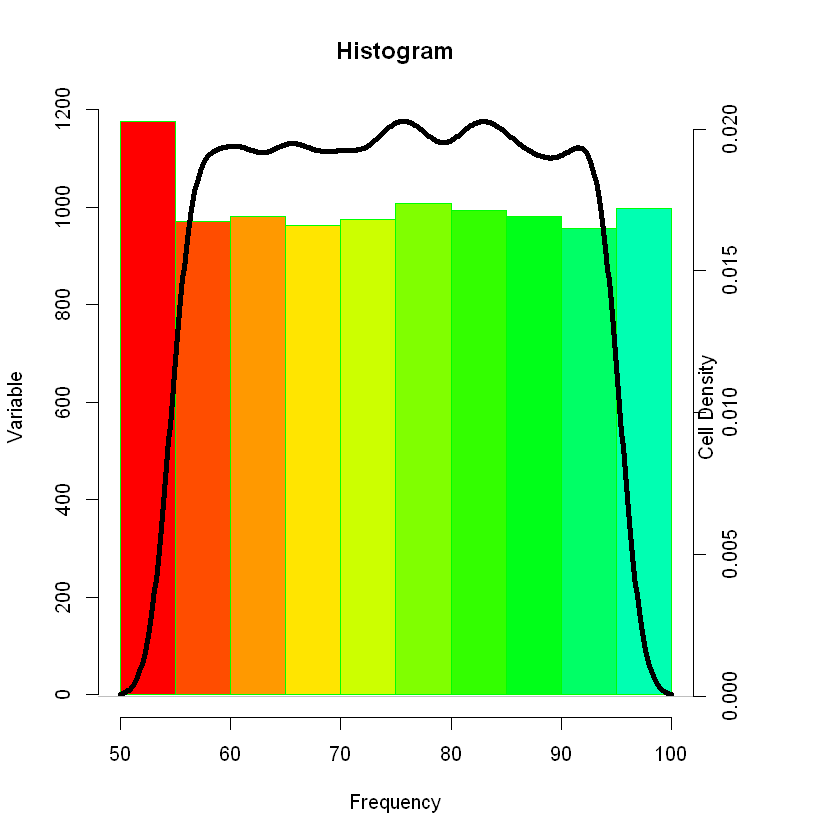

In [44]:
par(mar = c(5,4,4,6)+0.1)
m = hist(var , xlab = "Frequency" ,ylab = "Variable", col = rainbow(20), border = "green",
    breaks = 10, main = "Histogram")
par(new = T)
plot(density(var), lwd =4, col = "black", xlab = "", ylab = "", axes = F, main = "")
axis(4, col = "black", col.axis = "black")
mtext("Cell Density", side = 4, col = "black")

## Stacked Bar Plot
* In general we need a matrix to make a stacked bar plot

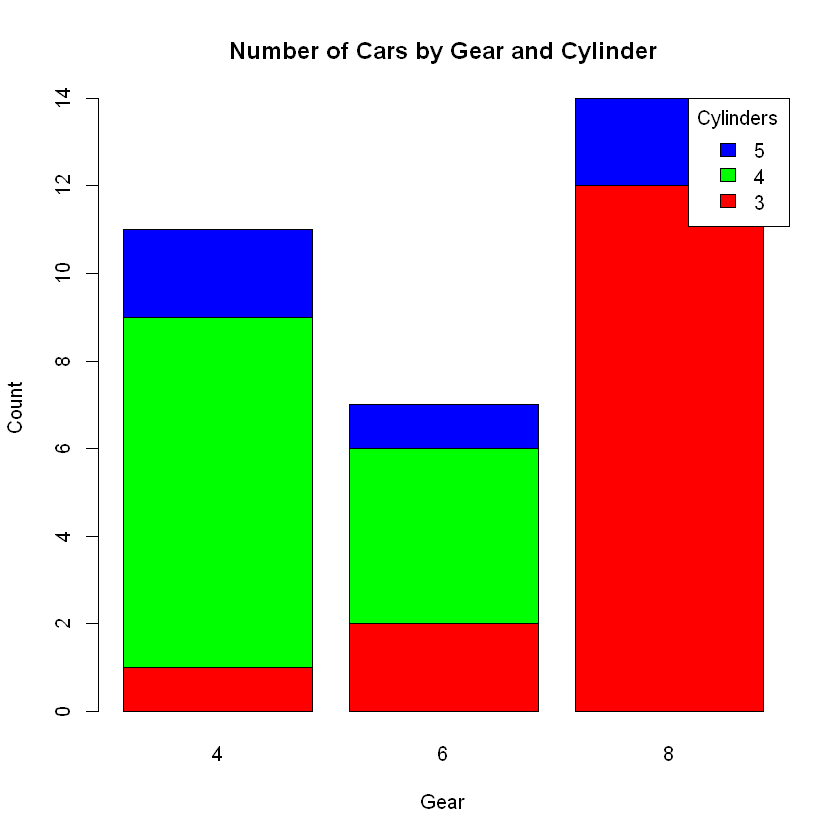

In [47]:
# Prepare Data
data <- table(mtcars$gear, mtcars$cyl)

# Create and Customize the Stacked Bar Plot
barplot(data, beside = FALSE, col = c("red", "green", "blue"), 
        legend = rownames(data), args.legend = list(title = "Cylinders", x = "topright"),
        main = "Number of Cars by Gear and Cylinder", xlab = "Gear", ylab = "Count")


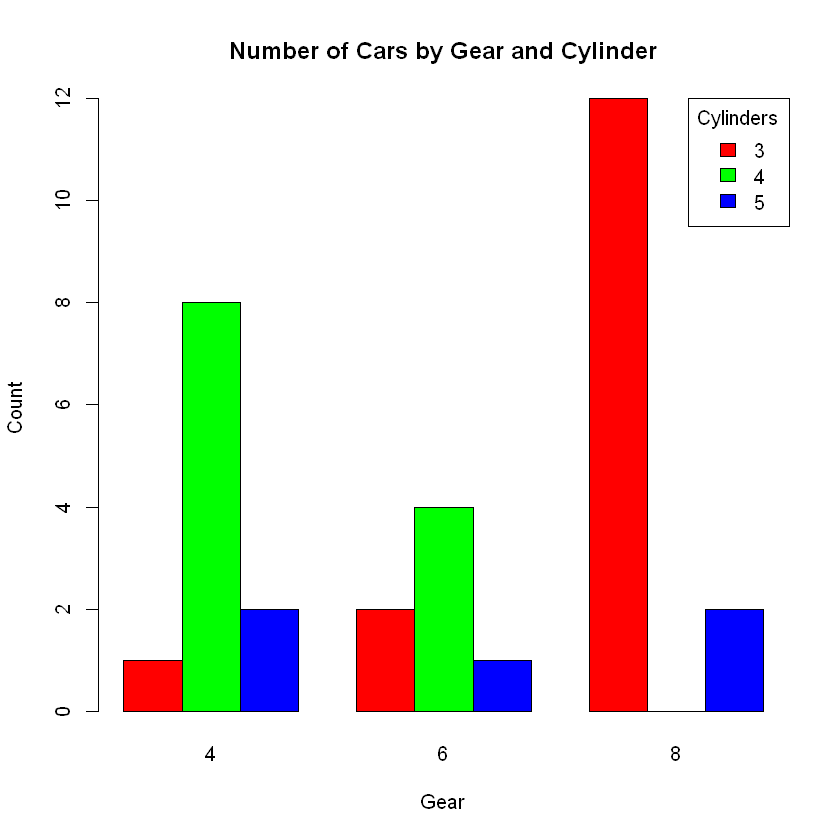

In [52]:
# Prepare Data
data <- table(mtcars$gear, mtcars$cyl)

# Create and Customize the Stacked Bar Plot
barplot(data, beside = T, col = c("red", "green", "blue"), 
        legend = rownames(data), args.legend = list(title = "Cylinders", x = "topright"),
        main = "Number of Cars by Gear and Cylinder", xlab = "Gear", ylab = "Count")


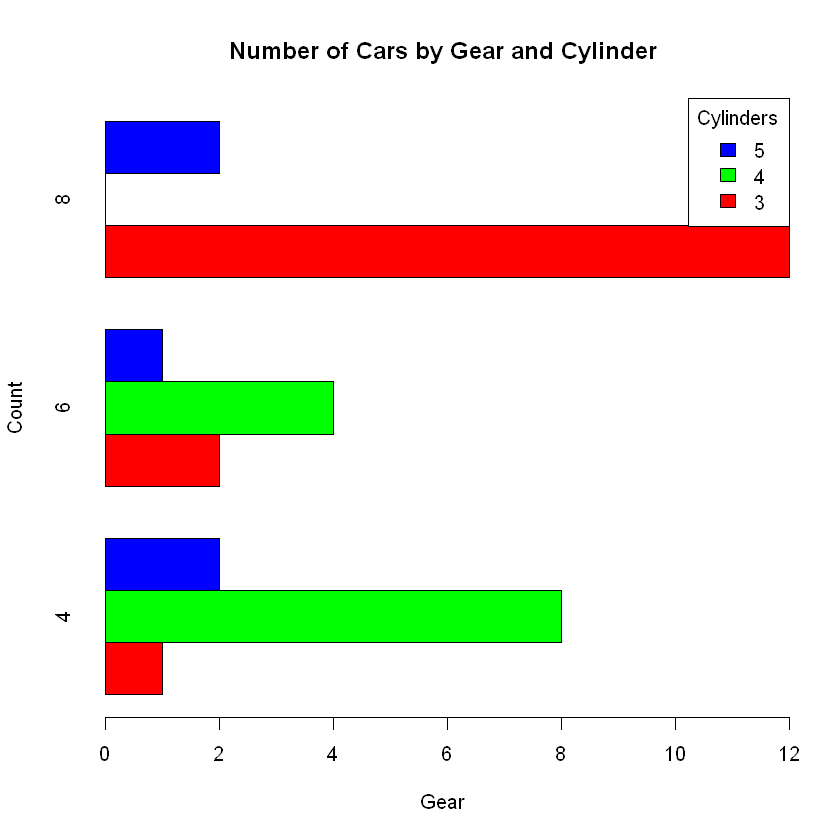

In [54]:
# Prepare Data
data <- table(mtcars$gear, mtcars$cyl)

# Create and Customize the Stacked Bar Plot
barplot(data, beside = T, col = c("red", "green", "blue"), 
        legend = rownames(data), args.legend = list(title = "Cylinders", x = "topright"),
        main = "Number of Cars by Gear and Cylinder", xlab = "Gear", ylab = "Count",horiz =T)
